In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving transfusion.data to transfusion.data
User uploaded file "transfusion.data" with length 12843 bytes


In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('transfusion.data', index_col=None)
data.tail(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
738,23,1,250,23,0
739,23,4,1000,52,0
740,23,1,250,23,0
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [3]:
y=data['whether he/she donated blood in March 2007']
X=data.drop(columns="whether he/she donated blood in March 2007")
y=y.values
X=X.values

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,5)
n=10
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=n, shuffle=True, random_state=5)
total=dict()
ac=dict()
se=dict()
sp=dict()
cm=dict()
for i,k in enumerate(neighbors):
    cm[i]=[]
    total[i]=[]
    ac[i]=[]
    se[i]=[]
    sp=[]
    knn = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cm[i].append((confusion_matrix(y_test, y_pred)).astype(float))


In [5]:
total=dict()
se=dict()
ac=dict()
sp=dict()
for i in range (len (neighbors)):
    total[i]=[]
    ac[i]=[]
    se[i]=[]
    sp[i]=[]
    for j in range (n):
        total[i].append(sum(sum(cm[i][j])))
        ac[i].append((cm[i][j][0,0]+cm[i][j][1,1])/total[i][j])
        se[i].append(cm[i][j][0,0]/(cm[i][j][0,0]+cm[i][j][0,1]))
        sp[i].append(cm[i][j][1,1]/(cm[i][j][1,0]+cm[i][j][1,1]))
np.mean(ac[0])
Sensitivity =np.empty(len(neighbors))
Spesificity = np.empty(len(neighbors))
Accuracy = np.empty(len(neighbors))
for i in range (len (neighbors)):
    Accuracy[i]=np.mean(ac[i])
    Spesificity[i]=np.mean(se[i])
    Sensitivity[i]=np.mean(sp[i])


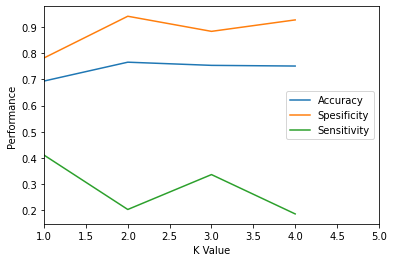

In [6]:
import matplotlib.pyplot as plt
neighbors = np.arange(1, 5,1)
plt.plot(neighbors, Accuracy, label='Accuracy')
plt.plot(neighbors, Spesificity, label='Spesificity')
plt.plot(neighbors, Sensitivity, label='Sensitivity')
plt.legend()
plt.xlim(1,5)
plt.xlabel('K Value')
plt.ylabel('Performance')
plt.savefig('Pemilihan nilaik',dpi=300)
plt.show()

In [7]:
df_k=pd.DataFrame()
performa=dict()
for j in range (3):
    performa[j] = []
for i in range (len (neighbors)):
    performa[0].append(Accuracy[i])
    performa[1].append(Sensitivity[i])
    performa[2].append(Spesificity[i])
for i in range (3):
    df_k=pd.concat([df_k,pd.DataFrame(performa[i])],axis=1)
df_k.columns=['Accuracy','Sensitivity','Spesificity']
df_k

,Accuracy,Sensitivity,Spesificity
0,0.693964,0.410131,0.782456
1,0.766126,0.201961,0.942105
2,0.753982,0.335621,0.884211
3,0.751369,0.184967,0.928070
